In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
from   datetime          import timedelta

In [2]:
# Preparing data for portfolio

num_securities = 30
num_periods    = 200
start_date     = pd.to_datetime('2022-01-01')
end_date       = pd.to_datetime('2023-12-31')

trade_dates    = pd.to_datetime(np.sort(np.random.choice(pd.date_range(start=start_date, end=end_date, periods=num_periods + 1), num_periods, replace=False)))

df = pd.DataFrame({'datetime'  : trade_dates})
df['datetime' ] = pd.to_datetime(df['datetime'])
df['datetime_'] = df['datetime']
df = df.set_index('datetime')

outliers_percentage = 20.0
outliers_percentage = outliers_percentage/100.0 # percentage of all returns are outliers
outliers_count      = int(num_periods*outliers_percentage)

for idx in range(0, num_securities):
    percentage_changes = np.random.uniform(-0.045, 0.055, num_periods).astype(float)
    extreme_returns    = np.random.uniform(-0.09,  0.1, outliers_count).astype(float)
    outliers_date      = df['datetime_'].sample(n=outliers_count).to_list()
    df[f"pct_change_{idx}"] = percentage_changes
    for outlier in list(zip(outliers_date, extreme_returns)):
        outlier_dt  = outlier[0]
        outlier_ret = outlier[1]
        df.loc[outlier_dt, f"pct_change_{idx}"] = outlier_ret
    df[f"ret_path_{idx}"  ] = df[f"pct_change_{idx}"].cumsum()

df.drop('datetime_', axis=1, inplace=True)

df

,pct_change_0,ret_path_0,pct_change_1,ret_path_1,pct_change_2,ret_path_2,pct_change_3,ret_path_3,pct_change_4,ret_path_4,...,pct_change_25,ret_path_25,pct_change_26,ret_path_26,pct_change_27,ret_path_27,pct_change_28,ret_path_28,pct_change_29,ret_path_29
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,-0.031049,-0.031049,0.044113,0.044113,0.025985,0.025985,-0.028676,-0.028676,0.051690,0.051690,...,-0.030787,-0.030787,0.005530,0.005530,-0.012264,-0.012264,-0.006899,-0.006899,0.006961,0.006961
2022-01-04 15:28:48,0.041609,0.010559,-0.028687,0.015426,-0.033187,-0.007202,0.004940,-0.023736,-0.002702,0.048987,...,0.049426,0.018639,0.081821,0.087351,0.067992,0.055728,-0.039549,-0.046448,0.020597,0.027558
2022-01-08 06:57:36,0.053196,0.063756,0.021252,0.036678,-0.001852,-0.009054,0.049967,0.026231,0.011024,0.060011,...,-0.034826,-0.016186,0.033175,0.120525,0.021798,0.077526,0.002678,-0.043770,0.050007,0.077566
2022-01-11 22:26:24,-0.020225,0.043530,-0.020339,0.016339,-0.017580,-0.026634,-0.019534,0.006696,-0.021821,0.038191,...,-0.007534,-0.023721,0.025470,0.145995,0.008258,0.085783,-0.038274,-0.082044,-0.002471,0.075095
2022-01-15 13:55:12,-0.037100,0.006431,0.039239,0.055578,-0.083259,-0.109893,0.003868,0.010564,-0.004079,0.034111,...,-0.016653,-0.040374,0.038665,0.184661,0.072302,0.158086,-0.041420,-0.123464,0.053303,0.128397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-16 10:04:48,-0.015842,0.586780,0.064610,1.415581,-0.065286,1.506501,-0.006150,1.061252,0.006855,1.150637,...,-0.022284,0.376984,0.007150,1.277868,-0.088202,1.586030,0.040756,1.385602,0.027987,1.249035
2023-12-20 01:33:36,0.008209,0.594989,0.051992,1.467574,-0.033211,1.473290,0.026125,1.087378,0.013014,1.163651,...,-0.006757,0.370227,-0.007002,1.270865,-0.038957,1.547073,-0.005435,1.380167,0.037310,1.286344
2023-12-23 17:02:24,-0.037176,0.557813,0.034462,1.502036,-0.036342,1.436947,0.016616,1.103993,-0.037714,1.125936,...,0.011792,0.382019,-0.010913,1.259952,0.033925,1.580998,-0.017262,1.362906,-0.004408,1.281936


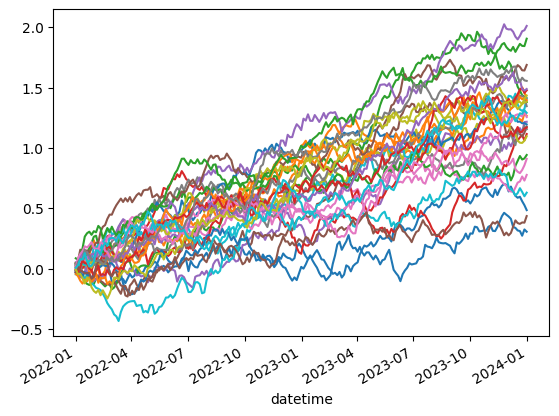

In [3]:
for idx in range(0, num_securities):
    df[f'ret_path_{idx}'].plot()